In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

mnist_fashion_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle Boot']


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [4]:
import matplotlib.pyplot as plt

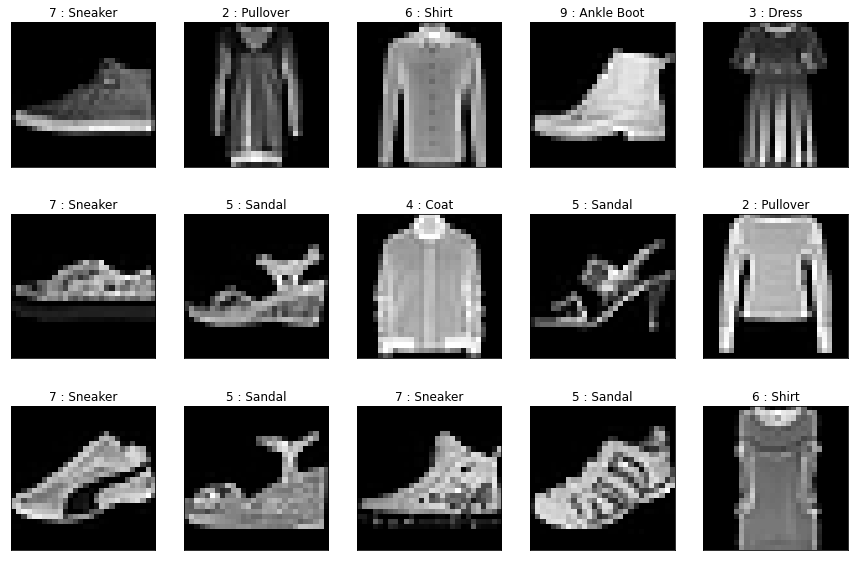

In [5]:
figure = plt.figure(figsize=(15, 10))
for index, i in enumerate(np.random.randint(0, x_train.shape[0], 15)):
    ax = figure.add_subplot(3, 5, index + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_title(f"{y_train[i]} : {mnist_fashion_labels[y_train[i]]}")
plt.show()

In [6]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [18]:
# 신경망 모델 설명
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [4]:
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

Epoch 1/12
469/469 - 152s - loss: 0.5389 - accuracy: 0.8112 - val_loss: 0.3421 - val_accuracy: 0.8768 - 152s/epoch - 325ms/step
Epoch 2/12
469/469 - 141s - loss: 0.3484 - accuracy: 0.8768 - val_loss: 0.2908 - val_accuracy: 0.8942 - 141s/epoch - 301ms/step
Epoch 3/12
469/469 - 140s - loss: 0.2986 - accuracy: 0.8928 - val_loss: 0.2658 - val_accuracy: 0.9050 - 140s/epoch - 299ms/step
Epoch 4/12
469/469 - 141s - loss: 0.2658 - accuracy: 0.9030 - val_loss: 0.2454 - val_accuracy: 0.9126 - 141s/epoch - 301ms/step
Epoch 5/12
469/469 - 140s - loss: 0.2387 - accuracy: 0.9127 - val_loss: 0.2292 - val_accuracy: 0.9161 - 140s/epoch - 299ms/step
Epoch 6/12
469/469 - 140s - loss: 0.2203 - accuracy: 0.9207 - val_loss: 0.2284 - val_accuracy: 0.9196 - 140s/epoch - 298ms/step
Epoch 7/12
469/469 - 140s - loss: 0.2027 - accuracy: 0.9249 - val_loss: 0.2236 - val_accuracy: 0.9189 - 140s/epoch - 299ms/step
Epoch 8/12
469/469 - 140s - loss: 0.1888 - accuracy: 0.9297 - val_loss: 0.2141 - val_accuracy: 0.9239 - 

In [5]:
# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)


정확률은 92.64000058174133


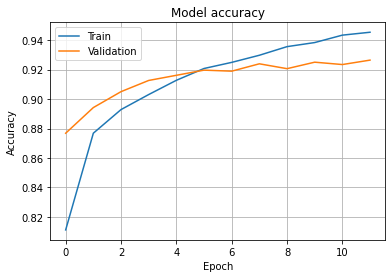

In [6]:
import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

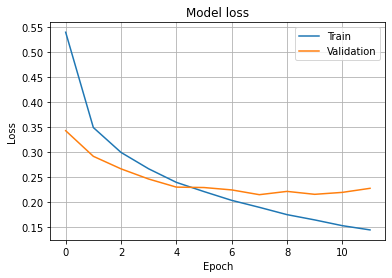

In [7]:
# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [20]:
cnn.predict(x_test[[10]])

array([[0.10308104, 0.11662586, 0.09522884, 0.0952141 , 0.08781136,
        0.10604964, 0.0986705 , 0.10294614, 0.09772175, 0.09665074]],
      dtype=float32)